In [1]:
#import library
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
#url
url = "https://www.thewhiskyexchange.com"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}

In [3]:
page = requests.get('https://www.thewhiskyexchange.com/c/35/japanese-whisky').text
soup=BeautifulSoup(page,'html.parser')

In [4]:
productlinks = []
for x in range(1,6):
    page = requests.get('https://www.thewhiskyexchange.com/c/35/japanese-whisky?pg={}&psize=24&sort=pasc'.format(x)).text
    soup=BeautifulSoup(page,'html.parser')
    productlist = soup.find_all("li",{"class":"product-grid__item"})


    for product in productlist:
        link = product.find("a",{"class":"product-card"}).get('href')                 
        productlinks.append(url + link)

In [5]:
# Export into dataframe

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

baseurl = "https://www.thewhiskyexchange.com"


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}
productlinks = []
t={}
data=[]
c=0
for x in range(1,6):
    k = requests.get('https://www.thewhiskyexchange.com/c/35/japanese-whisky?pg={}&psize=24&sort=pasc'.format(x)).text
    soup=BeautifulSoup(k,'html.parser')
    productlist = soup.find_all("li",{"class":"product-grid__item"})


    for product in productlist:
        link = product.find("a",{"class":"product-card"}).get('href')
        productlinks.append(baseurl + link)
        
for link in productlinks:
    f = requests.get(link,headers=headers).text
    hun=BeautifulSoup(f,'html.parser')

    try:
        price=hun.find("p",{"class":"product-action__price"}).text.replace('\n',"")
    except:
        price = None
        
    try:
        about=hun.find("div",{"class":"product-main__description"}).text.replace('\n',"")
    except:
        about=None

    try:
        rating = hun.find("div",{"class":"review-overview"}).text.replace('\n',"")
    except:
        rating=None

    try:
        name=hun.find("h1",{"class":"product-main__name"}).text.replace('\n',"")
    except:
        name=None

    whisky = {"name":name,"price":price,"rating":rating,"about":about}

    data.append(whisky)
    c=c+1
#     print("completed",c)
df = pd.DataFrame(data)

In [7]:
#Add image link

test = []
for x in range(1,6):
    k = requests.get('https://www.thewhiskyexchange.com/c/35/japanese-whisky?pg={}&psize=24&sort=pasc'.format(x)).text
    soup=BeautifulSoup(k,'html.parser')
    
    raw_links = soup.find_all("img")
    for link in raw_links:
        test.append(str(link))

In [8]:
# Processing
lin = []
for t in test:
    if 'data-original="https://img.thewhiskyexchange.com' in t:
        lin.append(t)

In [9]:
img_link = []
for j in range(len(lin)):
    im = lin[j].split('=')[3].replace('height','')[1:-2]
    img_link.append(im)

In [41]:
df['Link'] = img_link

In [42]:
#Save with excel format
df.to_excel('Whisky_Data.xlsx')

In [43]:
#Read file
df = pd.read_excel(r'C:\Users\Admin\Desktop\Data Analysis\Cerification Course for data analystic\Webscraping\Whisky_Data.xlsx')

In [44]:
df.head(3)

,Unnamed: 0,name,price,rating,about,Link
0,0,Akashi Red,£30.45,4(1 Review),Akashi Red is made at the Eigashima (aka White...,https://img.thewhiskyexchange.com/480/japan_ak...
1,1,Suntory Torys Classic,£30.45,3.5(2 Reviews),Suntory Torys Classic is a light and easy-drin...,https://img.thewhiskyexchange.com/480/japan_su...
2,2,Suntory Toki,£31.95,4(32 Reviews),Toki is a blended whisky from Suntory's three ...,https://img.thewhiskyexchange.com/480/japan_su...


In [13]:
#Data Wrangling

#Identify and handle missing values

In [45]:
missing_data = df.isnull()
missing_data.head(5)

,Unnamed: 0,name,price,rating,about,Link
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False


In [46]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    104
Name: Unnamed: 0, dtype: int64

name
False    104
Name: name, dtype: int64

price
False    104
Name: price, dtype: int64

rating
False    56
True     48
Name: rating, dtype: int64

about
False    96
True      8
Name: about, dtype: int64

Link
False    104
Name: Link, dtype: int64



In [16]:
#Deal with missing data

In [47]:
df.dropna(subset=['rating'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [49]:
df.head(2)

,name,price,rating,about,Link
0,Akashi Red,£30.45,4(1 Review),Akashi Red is made at the Eigashima (aka White...,https://img.thewhiskyexchange.com/480/japan_ak...
1,Suntory Torys Classic,£30.45,3.5(2 Reviews),Suntory Torys Classic is a light and easy-drin...,https://img.thewhiskyexchange.com/480/japan_su...


In [50]:
rating_of_customers = []
for i in range(len(df['price'])):
    rating_of_customers.append(df['rating'].str.split('(')[i][0])

In [51]:
df['rating_of_customers'] = rating_of_customers

In [52]:
number_of_review = []
for i in range(len(df['price'])):
    number_of_review.append(df['rating'].str.split('(')[i][1][:2])

In [53]:
df['number_of_review'] = number_of_review

In [54]:
df.head()

,name,price,rating,about,Link,rating_of_customers,number_of_review
0,Akashi Red,£30.45,4(1 Review),Akashi Red is made at the Eigashima (aka White...,https://img.thewhiskyexchange.com/480/japan_ak...,4,1
1,Suntory Torys Classic,£30.45,3.5(2 Reviews),Suntory Torys Classic is a light and easy-drin...,https://img.thewhiskyexchange.com/480/japan_su...,3.5,2
2,Suntory Toki,£31.95,4(32 Reviews),Toki is a blended whisky from Suntory's three ...,https://img.thewhiskyexchange.com/480/japan_su...,4,32
3,Akashi Blended Whisky,£32.95,3.5(19 Reviews),A lesser-known whisky outside the local Japane...,https://img.thewhiskyexchange.com/480/japan_ak...,3.5,19
4,Hatozaki Blended Japanese Whisky,£33.95,3(3 Reviews),Named after the oldest stone lighthouse in Jap...,https://img.thewhiskyexchange.com/480/japan_ha...,3,3


In [25]:
# Correct data format

In [55]:
df.dtypes

name                   object
price                  object
rating                 object
about                  object
Link                   object
rating_of_customers    object
number_of_review       object
dtype: object

In [56]:
df['rating_of_customers'] = df['rating_of_customers'].astype('float')

In [57]:
df['number_of_review'] = df['number_of_review'].astype('int')

In [58]:
df.dtypes

name                    object
price                   object
rating                  object
about                   object
Link                    object
rating_of_customers    float64
number_of_review         int32
dtype: object

In [59]:
df['price'].head()

0    £30.45
1    £30.45
2    £31.95
3    £32.95
4    £33.95
Name: price, dtype: object

In [31]:
# Save clean data

In [60]:
df.to_excel('Whiskey_clean_data.xlsx')

In [33]:
# Data Visualization

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use('ggplot')

In [66]:
price_edit = df['price'].str.replace('£', '')

In [67]:
for j in range(49,56):
    price_edit[j] = price_edit[j].replace(',','')

In [69]:
VND = []
for i in range(len(df['price'])):
    VND.append(round(float(price_edit[i])*31200/1000000,3))

In [70]:
df['VND'] = VND

In [71]:
df['VND'] = df['VND'].astype('float')

In [72]:
price_edit = price_edit.astype('float')

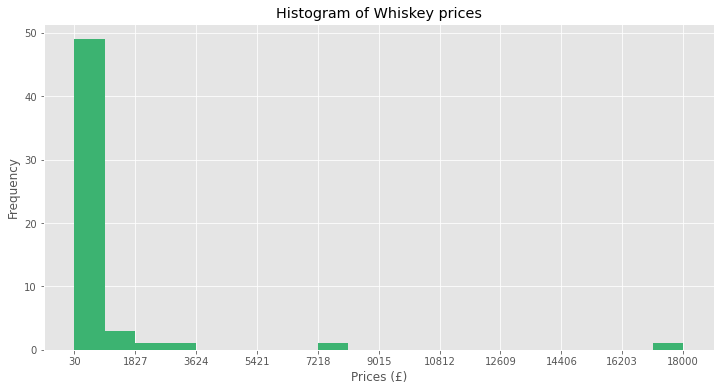

In [73]:
count, bin_edges = np.histogram(price_edit)
price_edit.plot(kind='hist', 
                figsize=(12,6),
                xticks=bin_edges, 
                bins = 20, 
               color = 'mediumseagreen')

plt.title('Histogram of Whiskey prices')
plt.xlabel('Prices (£)')
plt.ylabel('Frequency')
plt.show()

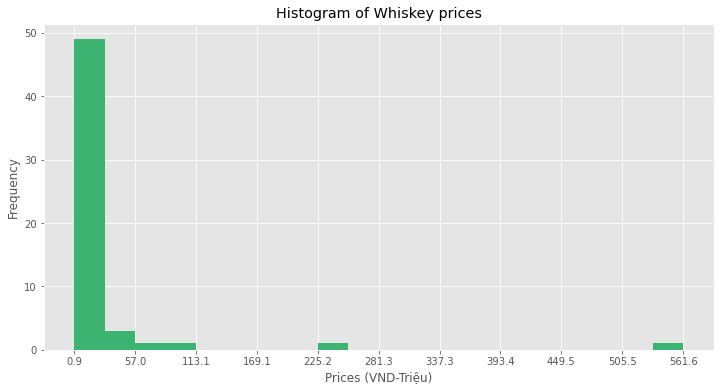

In [74]:
count, bin_edges = np.histogram(df['VND'])
df['VND'].plot(kind='hist', 
                figsize=(12,6),
                xticks=bin_edges, 
                bins = 20, 
               color = 'mediumseagreen')

plt.title('Histogram of Whiskey prices')
plt.xlabel('Prices (VND-Triệu)')
plt.ylabel('Frequency')
plt.show()

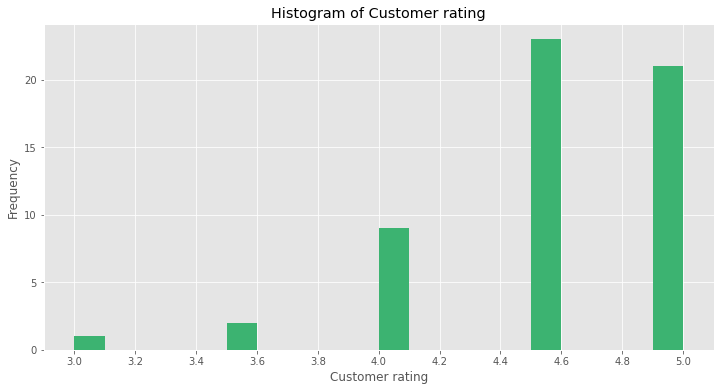

In [75]:
count, bin_edges = np.histogram(df['rating_of_customers'])

df['rating_of_customers'].plot(kind='hist', 
                figsize=(12,6),
                xticks=bin_edges, 
                bins = 20, 
               color = 'mediumseagreen')

plt.title('Histogram of Customer rating')
plt.xlabel('Customer rating')
plt.ylabel('Frequency')
plt.show()

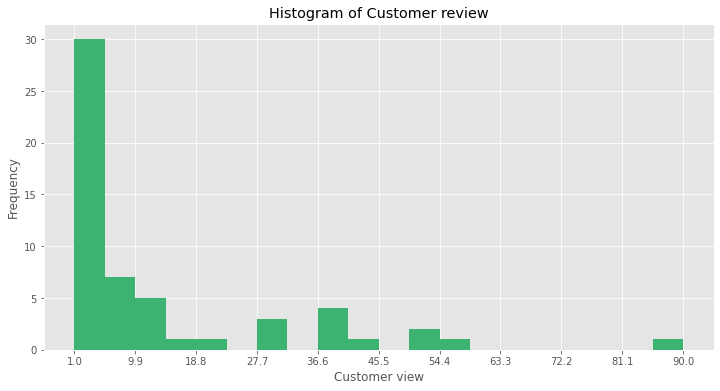

In [78]:
count, bin_edges = np.histogram(df['number_of_review'])

df['number_of_review'].plot(kind='hist', 
                figsize=(12,6),
                xticks=bin_edges, 
                bins = 20, 
               color = 'mediumseagreen')

plt.title('Histogram of Customer review')
plt.xlabel('Customer view')
plt.ylabel('Frequency')
plt.show()